In [1]:
import xarray as xr
import rioxarray as rxr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
### Plotting stuff 
plt.rc('figure', figsize=(12, 10))
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB_ex1='#8dd3c7'
CB_ex2='#bebada'
CB_ex3='#ffffb3'
CB_ex4='#fb8072'
CB_ex5='#fdb462'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet,CB_ex1,CB_ex2,CB_ex3,CB_ex4,CB_ex5]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams.update({'font.size': 22})

In [3]:
def scpf_to_scls_by_pft(scpf_var, dataset):
    """function to reshape a fates multiplexed size and pft-indexed variable to one indexed by size class and pft
    first argument should be an xarray DataArray that has the FATES SCPF dimension
    second argument should be an xarray Dataset that has the FATES SCLS dimension 
    (possibly the dataset encompassing the dataarray being transformed)
    returns an Xarray DataArray with the size and pft dimensions disentangled"""
    n_scls = len(dataset.fates_levscls)
    return (scpf_var.rolling(fates_levscpf=n_scls, center=False)
            .construct("fates_levscls")
            .isel(fates_levscpf=slice(n_scls-1, None, n_scls))
            .rename({'fates_levscpf':'fates_levpft'})
            .assign_coords({'fates_levscls':dataset.fates_levscls}))
def scag_to_scls_by_age(scag_var, dataset):
    """function to reshape a fates multiplexed size and pft-indexed variable to one indexed by size class and pft
    first argument should be an xarray DataArray that has the FATES SCAG dimension
    second argument should be an xarray Dataset that has the FATES age dimension 
    (possibly the dataset encompassing the dataarray being transformed)
    returns an Xarray DataArray with the size and age dimensions disentangled"""
    n_age = len(dataset.fates_levage)
    return (scag_var.rolling(fates_levscag=n_age, center=False)
            .construct("fates_levage")
            .isel(fates_levscag=slice(n_age-1, None, n_age))
            .rename({'fates_levscag':'fates_levpft'})
            .assign_coords({'fates_levage':dataset.fates_levage}))
def monthly_to_annual(array):
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

def monthly_to_month_by_year(array):
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)).rename({'time':'year'}))


def ProcessbyPAge(Data,Var,Time):
    out=pd.DataFrame({"Age"+str(Ages[0]):np.array(Data[Var][:,0]).flatten(),
              "Age"+str(Ages[1]):np.array(Data[Var][:,1]).flatten(),
              "Age"+str(Ages[2]):np.array(Data[Var][:,2]).flatten(),
              "Age"+str(Ages[3]):np.array(Data[Var][:,3]).flatten(),
              "Age"+str(Ages[4]):np.array(Data[Var][:,4]).flatten(),
              "Age"+ str(Ages[5]):np.array(Data[Var][:,5]).flatten(),
              "Age"+str(Ages[6]):np.array(Data[Var][:,6]).flatten()
              },index=Time)
    return(out)

def ProcessbyFuelClass(Data,Var,Time):
    out=pd.DataFrame({"FuelClass"+str(FuelClass[0]):np.array(Data[Var][:,0]).flatten(),
              "FuelClass"+str(FuelClass[1]):np.array(Data[Var][:,1]).flatten(),
              "FuelClass"+str(FuelClass[2]):np.array(Data[Var][:,2]).flatten(),
              "FuelClass"+str(FuelClass[3]):np.array(Data[Var][:,3]).flatten(),
              "FuelClass"+str(FuelClass[4]):np.array(Data[Var][:,4]).flatten(),
              "FuelClass"+str(FuelClass[5]):np.array(Data[Var][:,5]).flatten(),
              "FuelClass"+str(FuelClass[6]):np.array(Data[Var][:,6]).flatten()
              },index=Time)
    return(out)
def ProcesbyCanopyLay(Data,Var,Time):
    out=pd.DataFrame({"Understory"+str(Canopy[0]):np.array(Data[Var][:,0]).flatten(),
              "Canopy"+str(Canopy[1]):np.array(Data[Var][:,1]).flatten(),
              },index=Time)
    return(out)
def ProcesbyPFT(Data,Var,Time,PFT):
    out=pd.DataFrame({PFT[0]:np.array(Data[Var][:,0]).flatten(),
              PFT[1]:np.array(Data[Var][:,1]).flatten(),
              },index=Time)
    return(out)
def plotterage(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Age0.0'],label="Age 0.0")
    plt.plot(data['Age1.0'],label="Age 1.0")
    plt.plot(data['Age2.0'],label="Age 2.0")
    plt.plot(data['Age5.0'],label="Age 5.0")
    plt.plot(data['Age10.0'],label="Age 10.0")
    plt.plot(data['Age20.0'],label="Age 20.0")
    plt.plot(data['Age50.0'],label="Age 50.0")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
def plottercan(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Understory1'],label="Understory")
    plt.plot(data['Canopy2'],label="Overstory")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})

def plotterpft(data,PFT,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data[PFT[0]],label=PFT[0])
    plt.plot(data[PFT[1]],label=PFT[1])
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1),prop={'size': 20})

In [15]:
data_path = "C:/Users/345578/Documents/GitHub/Transfer_HPC/FATES_RUNS/SR_test526.nc"

Fates_xr  = xr.open_dataset(data_path)  
### Set up labels 
Fates_xr=Fates_xr.isel(time=slice(731,1050))
minlat = Fates_xr.variables['lat'].min()
maxlat = Fates_xr.variables['lat'].max()
minlon = Fates_xr.variables['lon'].min()
maxlon = Fates_xr.variables['lon'].max()
JM_fates = len(Fates_xr.variables['lat'])
IM_fates = len(Fates_xr.variables['lon'])

In [16]:
### Set up labels 
Ages=Fates_xr.coords['fates_levage'].values
Time=Fates_xr.indexes['time'].to_datetimeindex()
FuelClass=Fates_xr.indexes['fates_levfuel'].values  
Canopy=Fates_xr.indexes['fates_levcan'].values  
nscls_bins = len(Fates_xr.variables['fates_levscls'])
npfts = len(Fates_xr.variables['fates_levpft'])
nage_bins = len(Fates_xr.variables['fates_levage'])
#print(Time)

<ipython-input-16-5a840fb5fbed>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  Time=Fates_xr.indexes['time'].to_datetimeindex()


In [17]:
Fates_xr.coords

Coordinates: (12/13)
  * levgrnd          (levgrnd) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * levlak           (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp          (levdcmp) float32 0.007101 0.02792 0.06226 ... 21.33 35.18
  * fates_levscls    (fates_levscls) float32 0.0 5.0 10.0 ... 80.0 90.0 100.0
  * fates_levcacls   (fates_levcacls) float32 0.0 5.0
  * fates_levage     (fates_levage) float32 0.0 1.0 2.0 5.0 10.0 20.0 50.0
    ...               ...
  * fates_levfuel    (fates_levfuel) int32 1 2 3 4 5 6
  * fates_levcwdsc   (fates_levcwdsc) int32 1 2 3 4
  * fates_levcan     (fates_levcan) int32 1 2
  * fates_levheight  (fates_levheight) float32 0.0 0.1 0.3 1.0 3.0 10.0
  * fates_levelem    (fates_levelem) int32 1
  * time             (time) object 1992-01-01 00:00:00 ... 2018-07-01 00:00:00

  * scls = size-class dimension
  * cacls = cohort age-class dimension
  * pft  = the pft dimension
  * age = Age
  * cwdsc = the coarse woody debris size class dimension
  * nfsc = number fuel size classes
  * height
  * can = canopy 


## LUT for parameters 
### Overall
* 'PATCH_AREA_BY_AGE'
* 'AGB',
*  'AGB_SCLS',
### Eco 
* 'LAI_BY_AGE'
* 'LAI_CANOPY_SCLS',
* 'LAI_UNDERSTORY_SCLS',
* 'NPP'
* 'CANOPY_AREA_BY_AGE',
* 'CROWNAREA_CAN'

### Fire parameters
 * 'AREA_BURNT_BY_PATCH_AGE'=(Time, 7,1)
 * 'FIRE_FDI'
 * 'FIRE_FUEL_MEF'
 * 'FIRE_FUEL_SAV'
 * 'FIRE_IGNITIONS'
 * 'FIRE_FUEL_BULKD'
 * 'FUEL_AMOUNT_AGEFUEL',
 * 'FUEL_AMOUNT_BY_NFSC',
 * 'FUEL_MOISTURE_NFSC',
 * 'FIRE',
 * 'FIRE_AREA',
 * 'FIRE_FDI',
 * 'FIRE_FLUX',
 * 'FIRE_FUEL_BULKD',
 * 'FIRE_FUEL_EFF_MOIST',
 * 'FIRE_FUEL_MEF',
 * 'FIRE_FUEL_SAV',
 * 'FIRE_IGNITIONS',
 * 'FIRE_INTENSITY',
 * 'FIRE_INTENSITY_AREA_PRODUCT',
 * 'FIRE_INTENSITY_BY_PATCH_AGE',
 * 'FIRE_NESTEROV_INDEX',
 * 'FIRE_R',
 * 'FIRE_ROS',
 * 'FIRE_ROS_AREA_PRODUCT',
 * 'FIRE_TFC_ROS',
 * 'FIRE_TFC_ROS_AREA_PRODUCT',
 * 'FIRE_U',

In [18]:
list(Fates_xr.keys())

['fates_scmap_levscag',
 'fates_agmap_levscag',
 'fates_pftmap_levscpf',
 'fates_scmap_levscpf',
 'fates_pftmap_levcapf',
 'fates_camap_levcapf',
 'fates_canmap_levcnlf',
 'fates_lfmap_levcnlf',
 'fates_canmap_levcnlfpf',
 'fates_lfmap_levcnlfpf',
 'fates_pftmap_levcnlfpf',
 'fates_scmap_levscagpft',
 'fates_agmap_levscagpft',
 'fates_pftmap_levscagpft',
 'fates_pftmap_levagepft',
 'fates_agmap_levagepft',
 'fates_elmap_levelpft',
 'fates_pftmap_levelpft',
 'fates_elmap_levelcwd',
 'fates_cwdmap_levelcwd',
 'fates_elmap_levelage',
 'fates_agemap_levelage',
 'fates_agmap_levagefuel',
 'fates_fscmap_levagefuel',
 'mcdate',
 'mcsec',
 'mdcur',
 'mscur',
 'nstep',
 'time_bounds',
 'date_written',
 'time_written',
 'lon',
 'lat',
 'area',
 'topo',
 'landfrac',
 'landmask',
 'pftmask',
 'ZSOI',
 'DZSOI',
 'WATSAT',
 'SUCSAT',
 'BSW',
 'HKSAT',
 'ZLAKE',
 'DZLAKE',
 'ACTUAL_IMMOB',
 'ACTUAL_IMMOB_P',
 'ADSORBTION_P',
 'AGB',
 'AGB_SCLS',
 'AR',
 'AREA_BURNT_BY_PATCH_AGE',
 'AREA_PLANT',
 'ARE

## Plotters
##### Simulation wide 

In [19]:
GPP=np.array(Fates_xr['FIRE_NESTEROV_INDEX'])
np.shape(GPP)
#plt.plot(Time,GPP)
print(GPP)

(319, 1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

##### By age

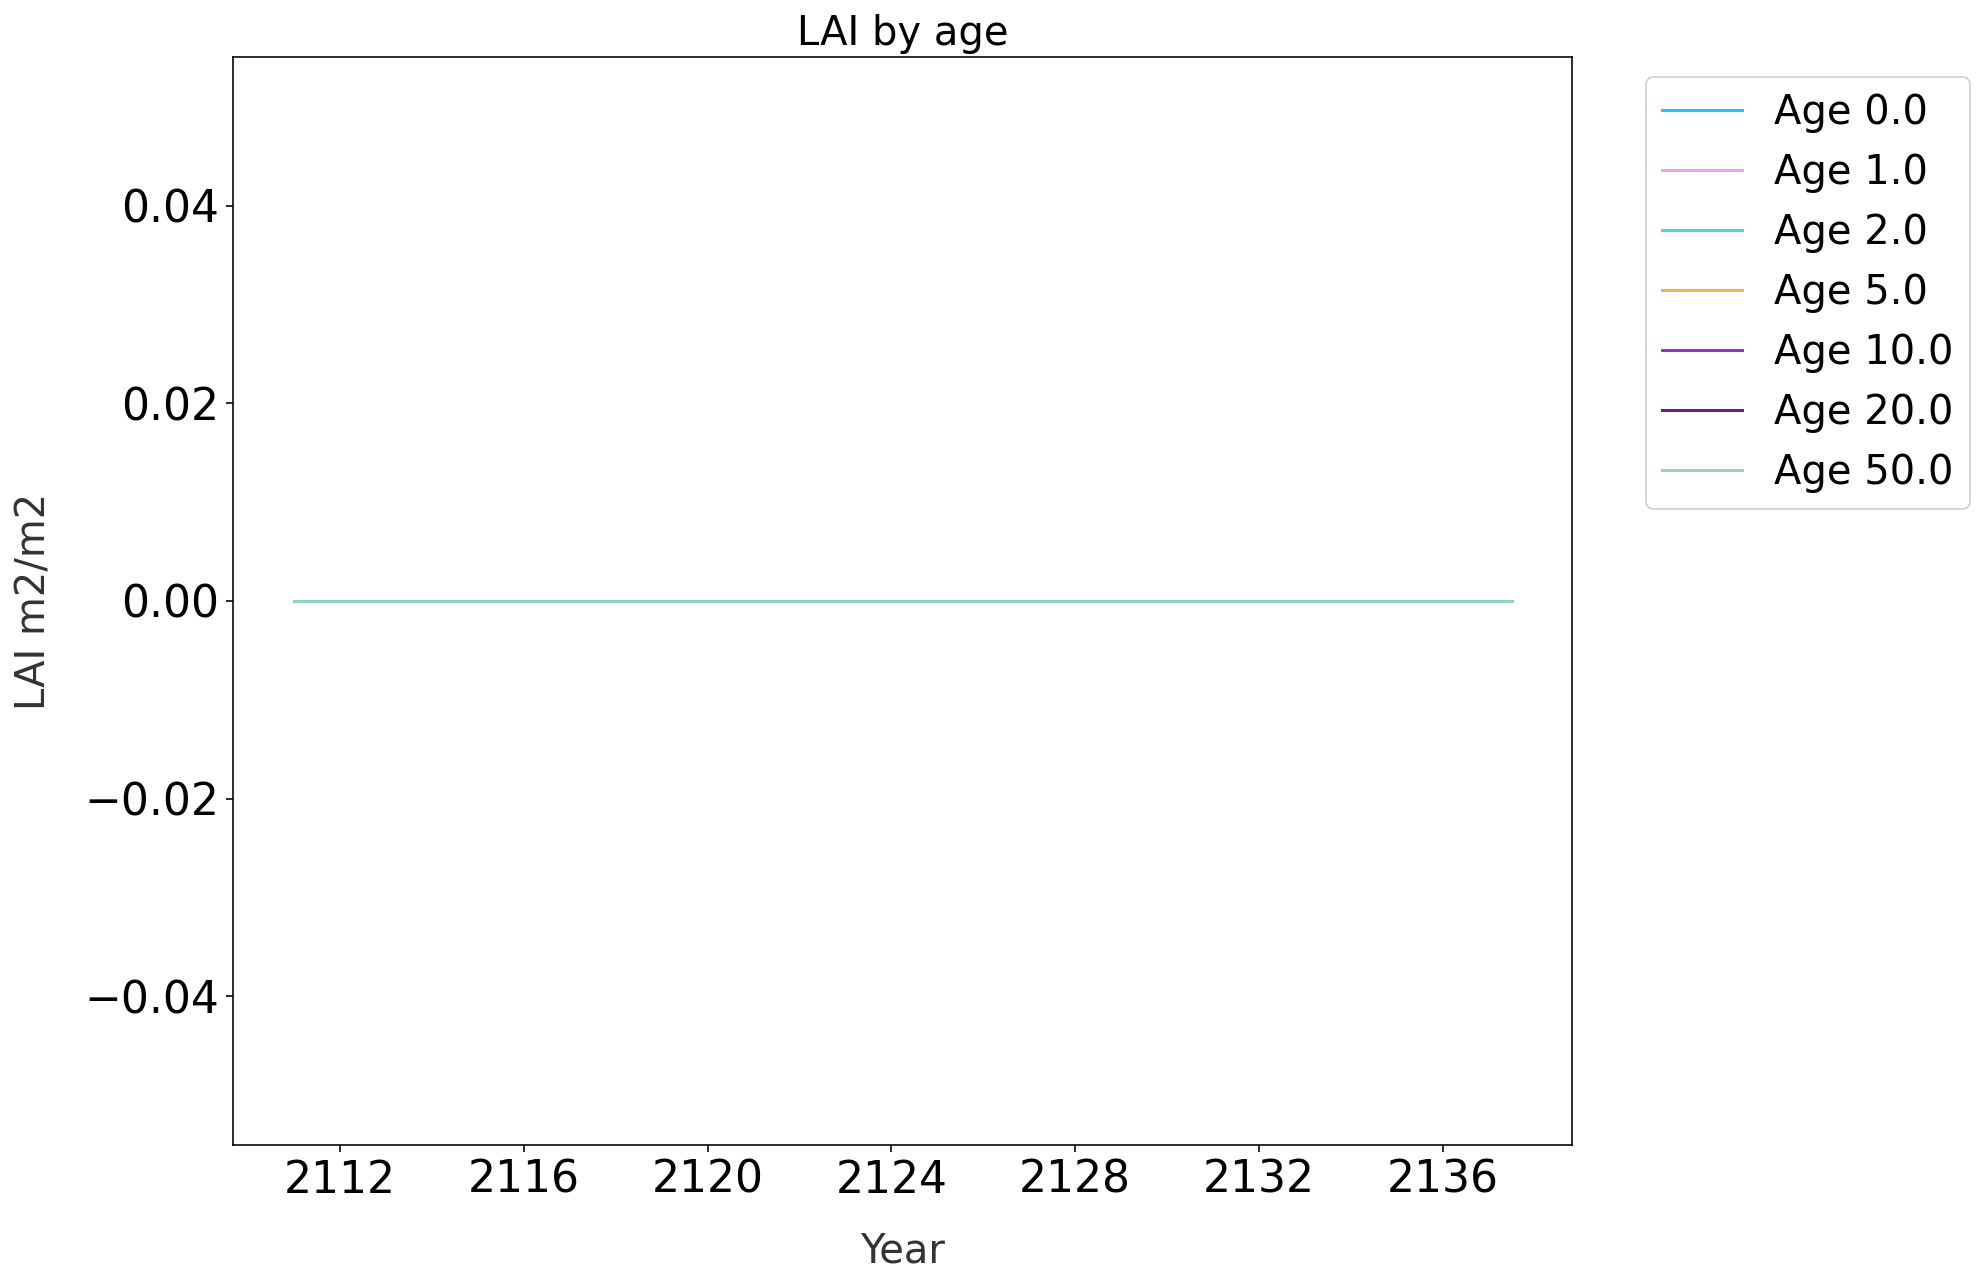

In [12]:
%config InlineBackend.figure_format = 'retina'
checkout=ProcessbyPAge(Fates_xr,'AREA_BURNT_BY_PATCH_AGE',Time) 
plotterage(checkout,"LAI by age","Year","LAI m2/m2",'lower right')          

##### By PFT

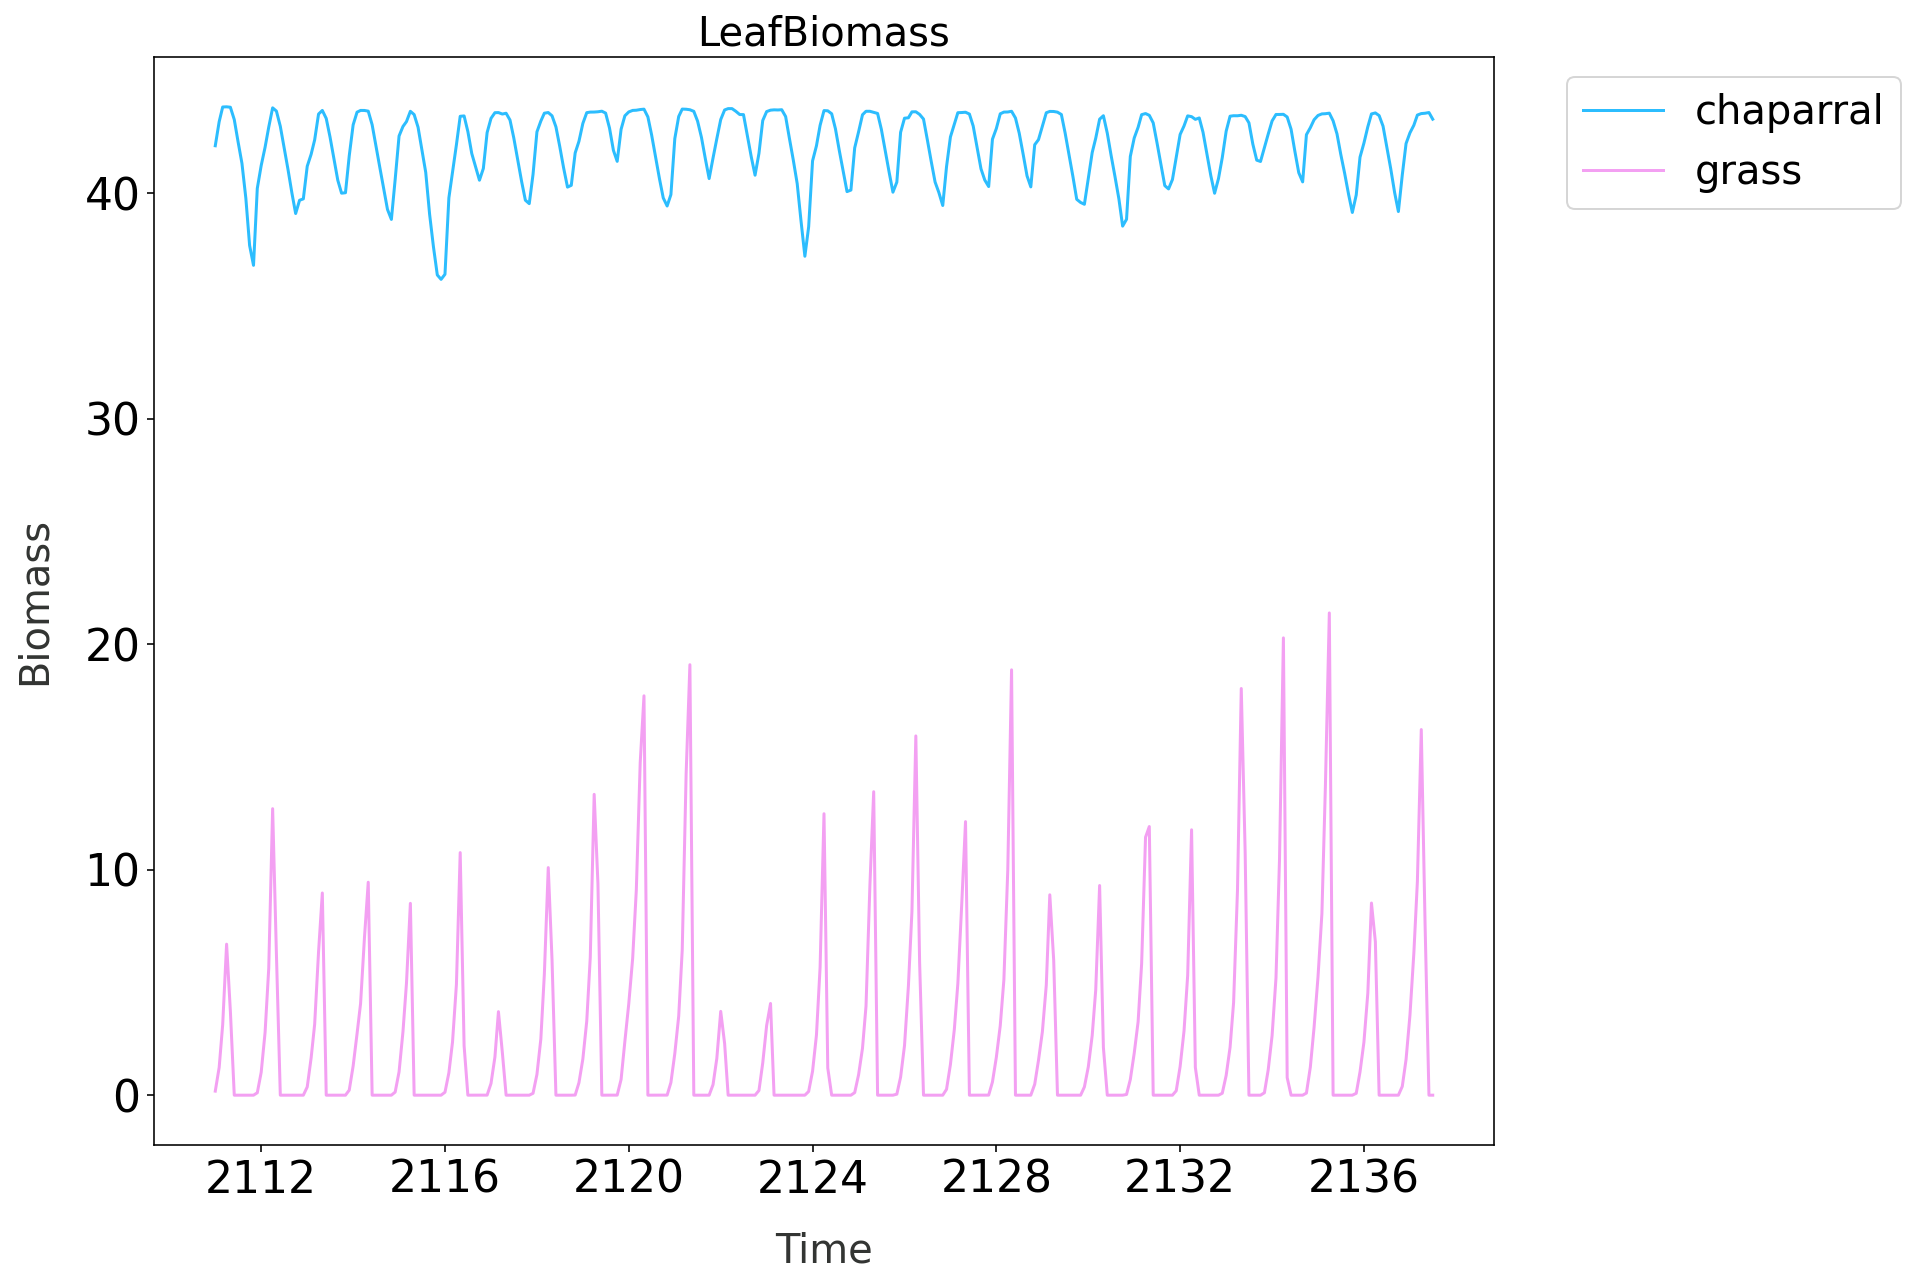

In [10]:
#plt.plot(np.array(Fates_xr.PFTleafbiomass)[:,0])
#plt.plot(np.array(Fates_xr.PFTleafbiomass)[:,1])
LeafBiobyPFt=ProcesbyPFT(Fates_xr,'PFTleafbiomass',Time,["chaparral","grass"])
plotterpft(LeafBiobyPFt,["chaparral","grass"],"LeafBiomass","Time","Biomass")

##### By Canopy Layer

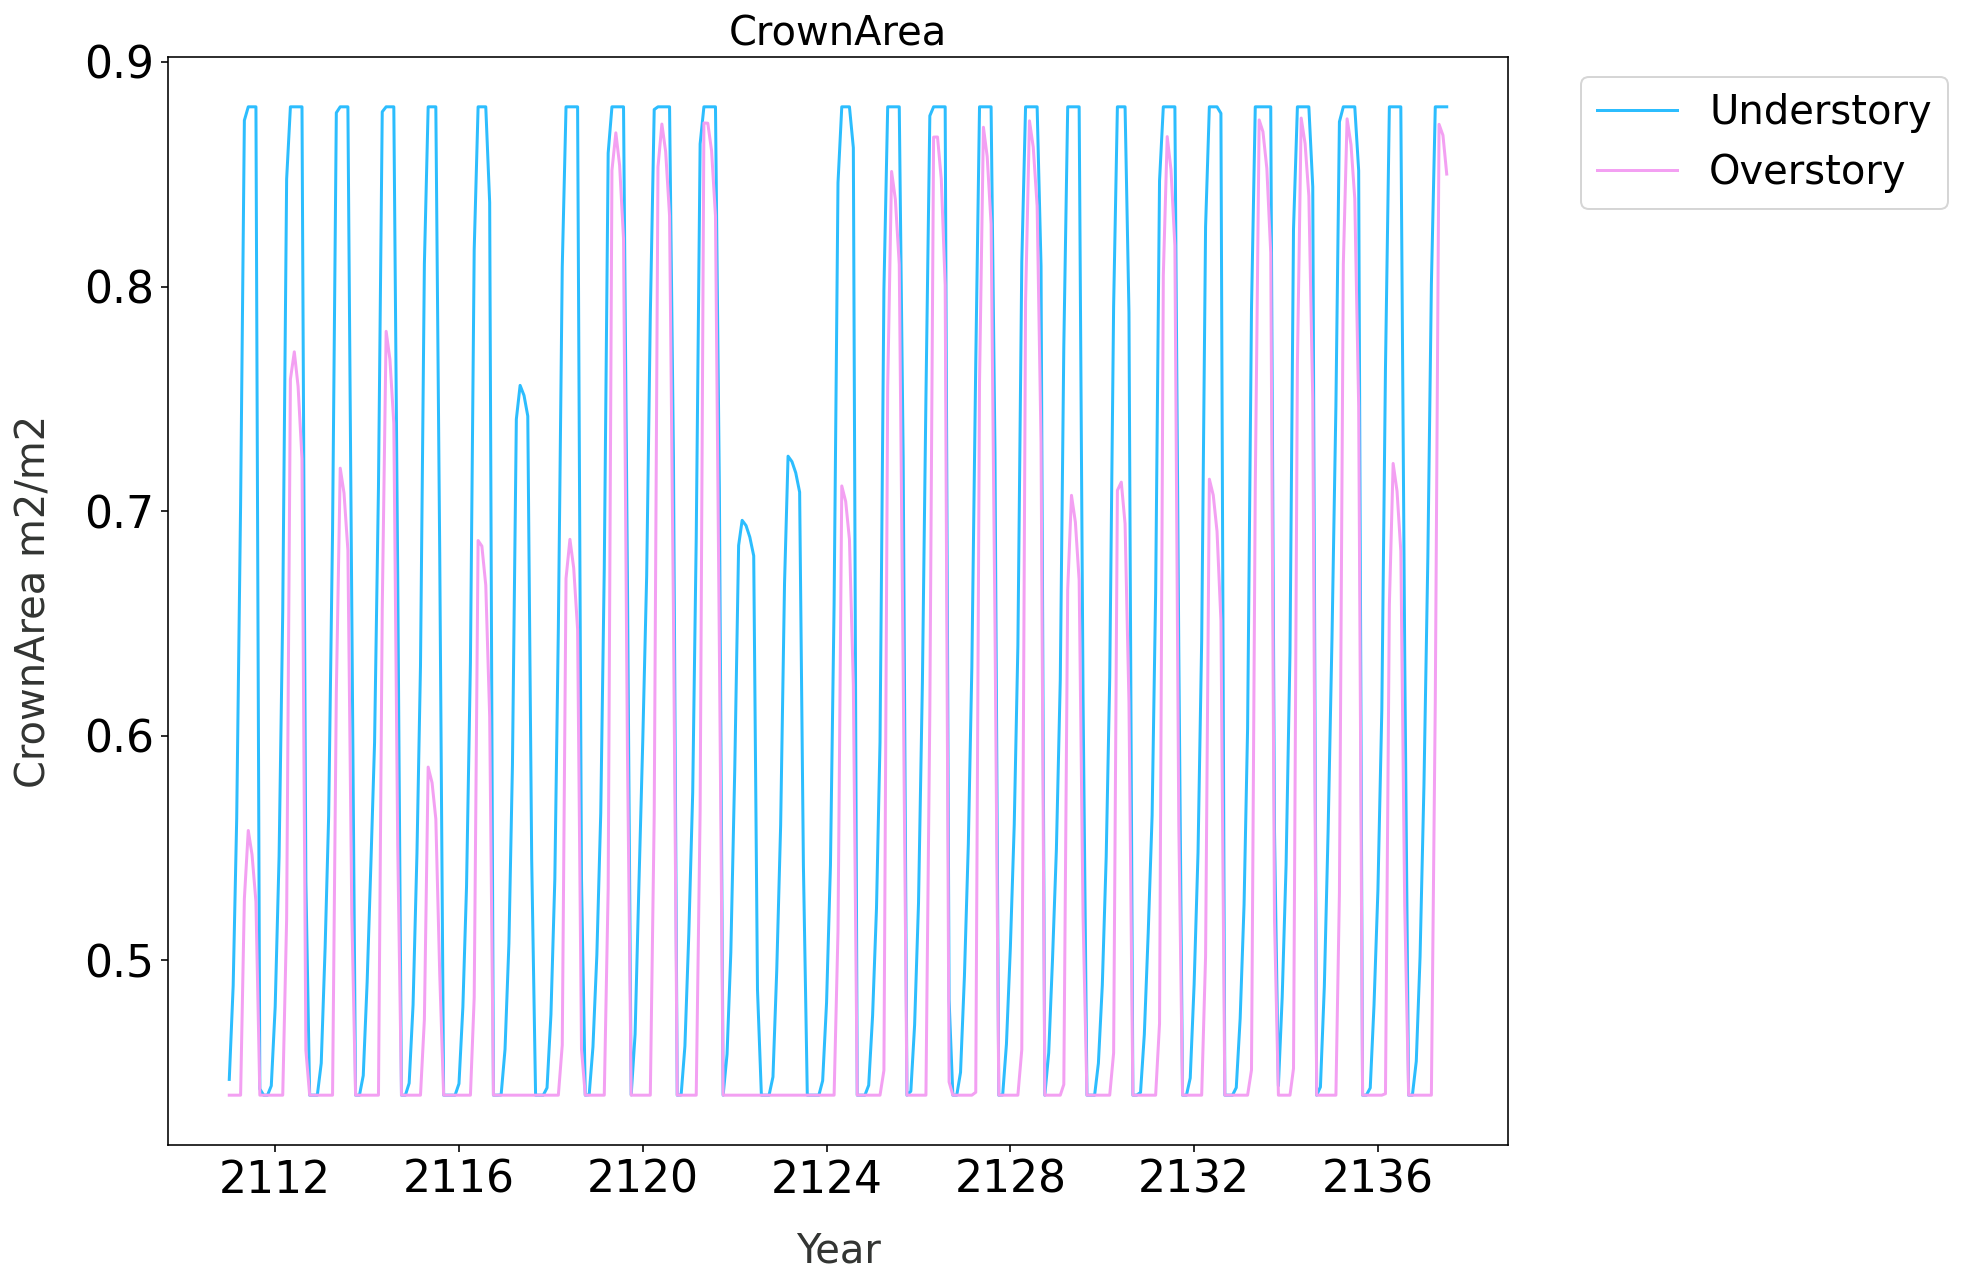

In [11]:
CROWN=ProcesbyCanopyLay(Fates_xr,'CROWNAREA_CAN',Time)
#print(CROWN)
plottercan(CROWN,"CrownArea","Year","CrownArea m2/m2",'lower right')